In [2]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('fatalities_2000_to_2023.csv')

In [4]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


Time Series Analysis

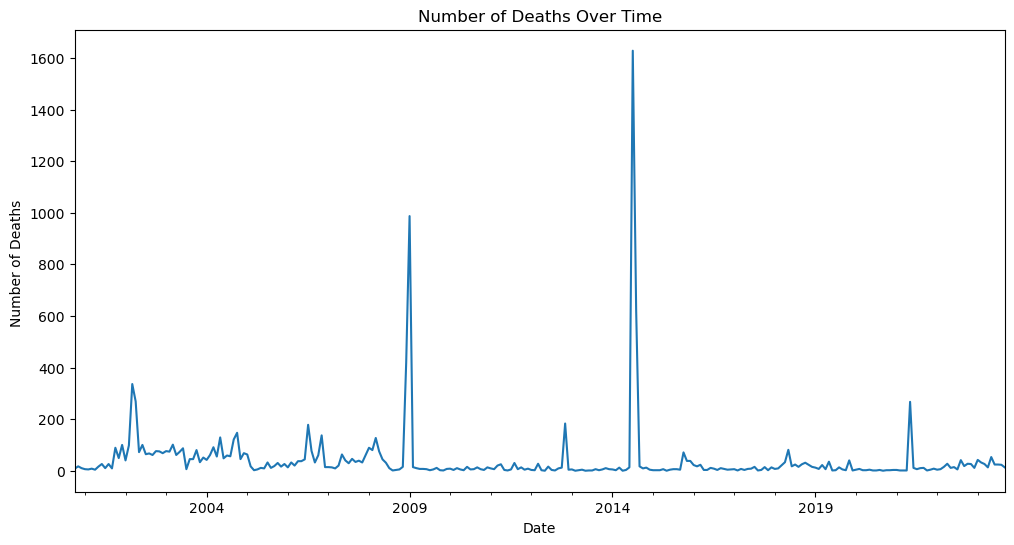

In [132]:
plt.figure(figsize=(12, 6))
df['date_of_death'] = pd.to_datetime(df['date_of_death'])
event_counts = df.resample('M', on='date_of_death').size()
event_counts.plot()
plt.title('Number of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths ')
plt.show()


Age Distribution

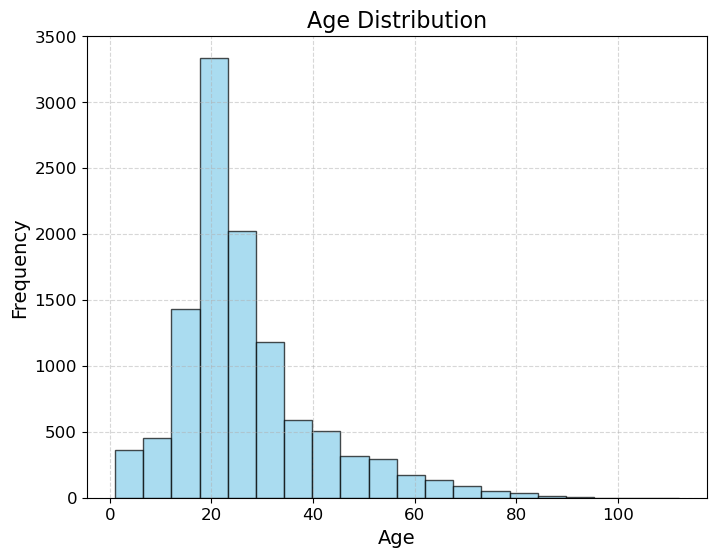

In [41]:


plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Gender Distribution

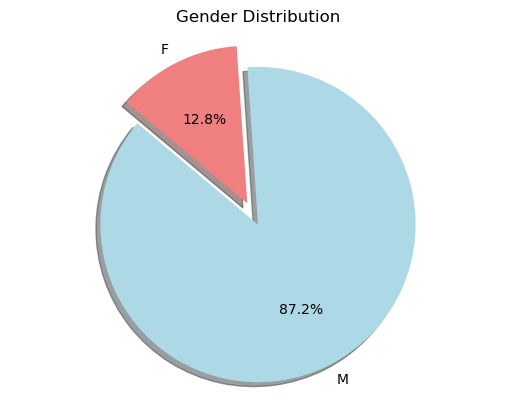

In [51]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, explode= (0.15,0), colors= ['lightblue', 'lightcoral'],shadow=True)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()


Location Analysis 


c:\Users\abhis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


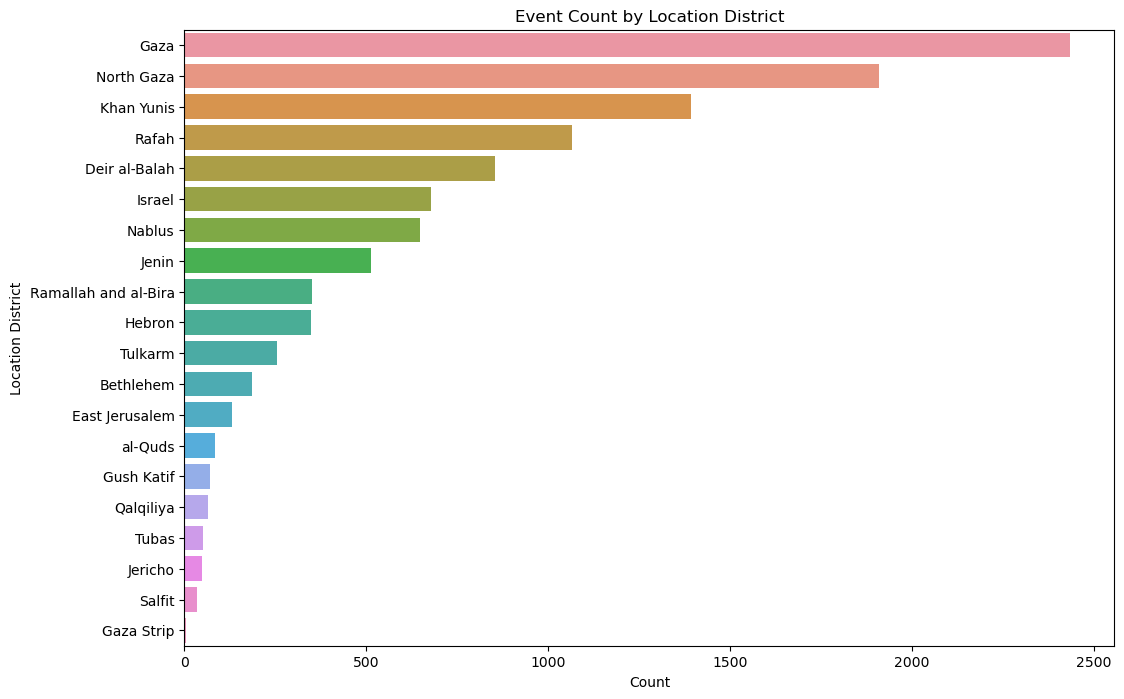

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(y='event_location_district', data=df, order=df['event_location_district'].value_counts().index)
plt.title('Event Count by Location District')
plt.xlabel('Count')
plt.ylabel('Location District')
plt.show()


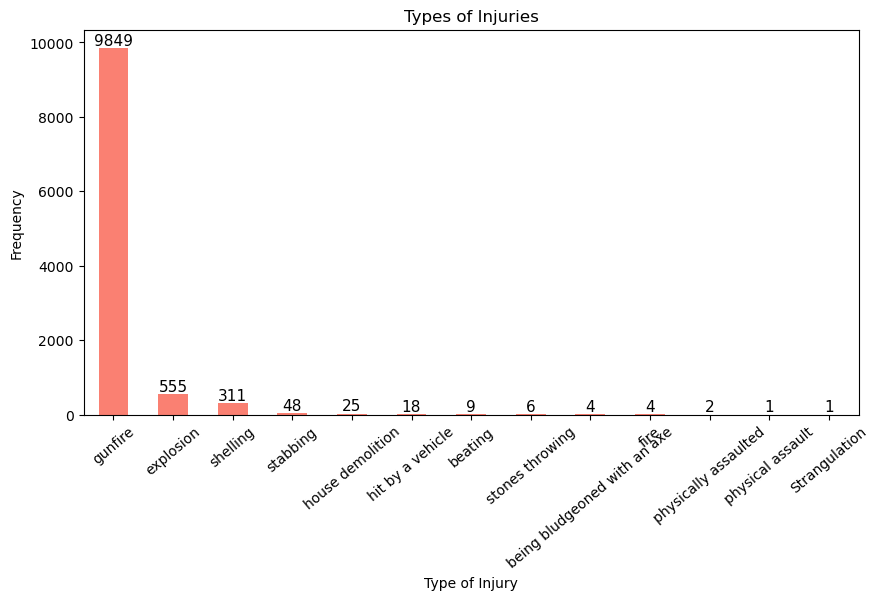

In [30]:
plt.figure(figsize=(10, 5))
injury_counts = df['type_of_injury'].value_counts()
injury_counts.plot(kind='bar', color='salmon')
plt.xlabel('Type of Injury')
plt.ylabel('Frequency')
plt.title('Types of Injuries')
plt.xticks(rotation=40)

# Adding counts below each bar
for i, count in enumerate(injury_counts):
    plt.text(i, count -2, str(count), ha='center', va='bottom', fontsize=11)

plt.show()



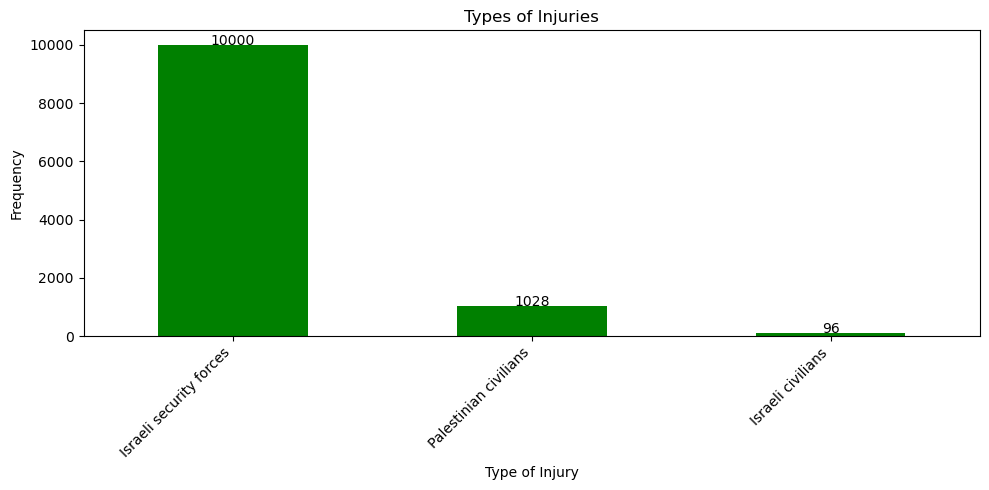

In [55]:
plt.figure(figsize=(10, 5))
killed_by_counts = df['killed_by'].value_counts()
ax = killed_by_counts.plot(kind='bar', color='green')
plt.xlabel('Type of Injury')
plt.ylabel('Frequency')
plt.title('Types of Injuries')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its count
for i, count in enumerate(killed_by_counts):
    ax.text(i, count + 0.1, str(count), ha='center')
plt.tight_layout()
plt.show()

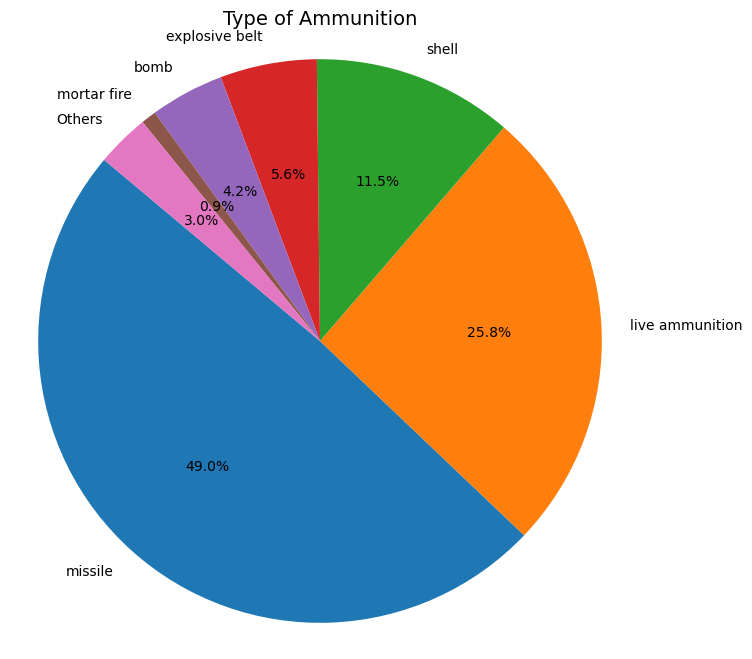

In [138]:
plt.figure(figsize=(8, 8))
ammo_counts = df['ammunition'].value_counts()
# Combine categories with less than 4.1% into 'Others'
ammo_counts['Others'] = ammo_counts[ammo_counts < 51].sum()
ammo_counts = ammo_counts[ammo_counts >= 51]
plt.pie(ammo_counts, labels=ammo_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Type of Ammunition', fontsize=14)
plt.show()


In [139]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Word Cloud for event_location


In [140]:
from wordcloud import WordCloud

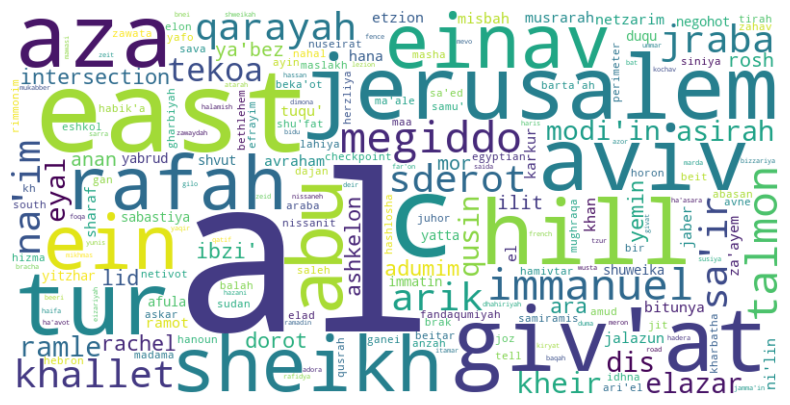

In [141]:

df['event_location'] = df['event_location'].str.replace('City', '', case=False)

# Assuming 'notes' is the column containing descriptions
notes = df['event_location'].str.lower().str.split()

# Combine all words into a single list
all_words = [word for sublist in notes for word in sublist]

# Create a set to remove duplicates
unique_words = set(all_words)

# Join unique words into a single string
unique_notes = ' '.join(unique_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unique_notes)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()